## Holt winter

In [2]:
# Importar las librerías necesarias
import pandas as pd
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt


# Ruta a la carpeta donde se encuentran los archivos de entrenamiento
train_folder = '/Users/josejavier-yenifer/Documents/Serie de Tiempo/Bono 1/train'

# Nombres de los archivos CSV
train_files = ['ex_1.csv', 'ex_9.csv', 'ex_20.csv', 'ex_21.csv', 'ex_23.csv', 'ex_24.csv']

# Cargar los archivos CSV en variables con prefijo 'df_' y nombre del archivo (sin .csv)
dfs = []
for file in train_files:
    file_name = file.split('.')[0]  # Eliminar la extensión .csv
    file_path = os.path.join(train_folder, file)
    
    # Crear una variable dinámica con el nombre df_<nombre_archivo>
    globals()[f"df_{file_name}"] = pd.read_csv(file_path)

    # Guardar el DataFrame para mostrar luego
    dfs.append((file_name, globals()[f"df_{file_name}"]))


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
import itertools
import warnings


In [5]:
def des_optimizer(train, val, ab, trend, step):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for comb in ab:
        alpha, beta = comb
        try:
            des_model = ExponentialSmoothing(
                train, trend=trend
            ).fit(
                smoothing_level=alpha, smoothing_slope=beta, optimized=False
            )
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(val, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
        except Exception as e:
            continue
    return best_alpha, best_beta, best_mae


In [6]:
def des_model_tuning(train, val, test, step, trend, title):
    alphas = betas = np.arange(0.1, 1, 0.1)
    ab = list(itertools.product(alphas, betas))
    best_alpha, best_beta, best_mae = des_optimizer(
        train, val, ab=ab, trend=trend, step=len(val)
    )

    # Si no se encontraron parámetros óptimos, usar optimized=True
    if best_alpha is None or best_beta is None:
        print(f"No se encontraron parámetros óptimos para {title}. Usando optimized=True.")
        train_val = pd.concat([train, val])
        final_model = ExponentialSmoothing(
            train_val, trend=trend
        ).fit(optimized=True)
    else:
        train_val = pd.concat([train, val])
        final_model = ExponentialSmoothing(
            train_val, trend=trend
        ).fit(
            smoothing_level=best_alpha, smoothing_slope=best_beta, optimized=False
        )

    y_pred = final_model.forecast(len(test))
    mae = mean_absolute_error(test, y_pred)

    # Gráfica de resultados
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Entrenamiento', color='blue')
    plt.plot(val.index, val, label='Validación', color='orange')
    plt.plot(test.index, test, label='Test', color='green')
    plt.plot(test.index, y_pred, label='Predicción', color='red', linestyle='--')
    plt.title(f"{title} - MAE: {round(mae, 2)}")
    plt.xlabel('Tiempo')
    plt.ylabel('Potencia Eléctrica (W)')
    plt.legend()
    plt.show()

    return best_alpha, best_beta, mae


/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2411436008.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/miniconda3

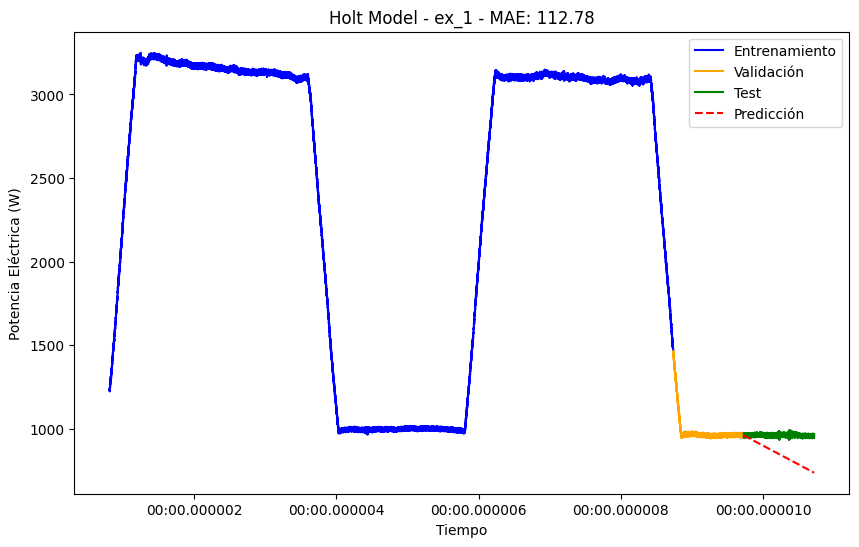

/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2949666628.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_holt_df = pd.concat([metrics_holt_df, temp_df], ignore_index=True)
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2411436008.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was pro

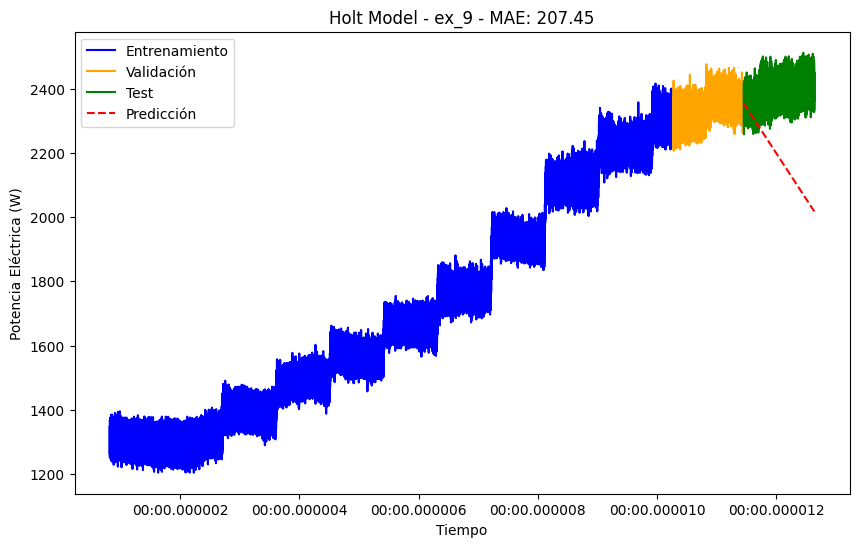

/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2411436008.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/miniconda3

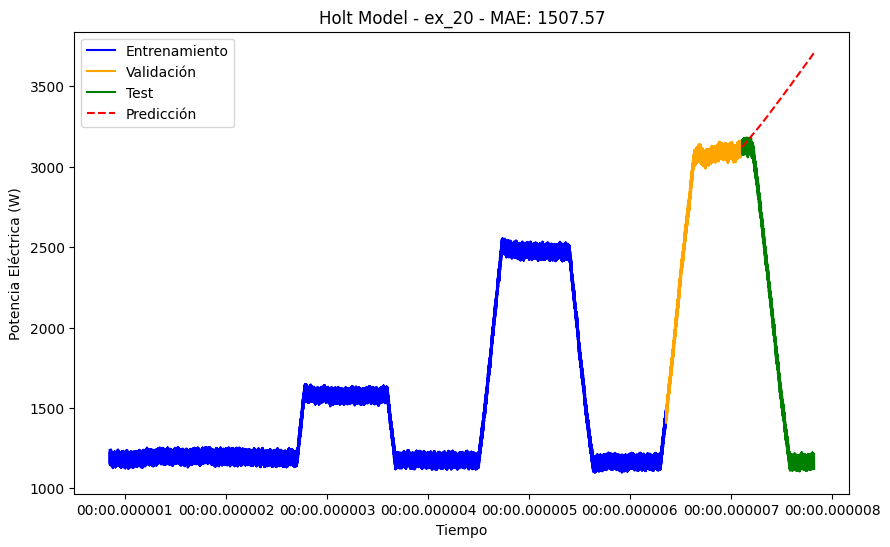

/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2411436008.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/miniconda3

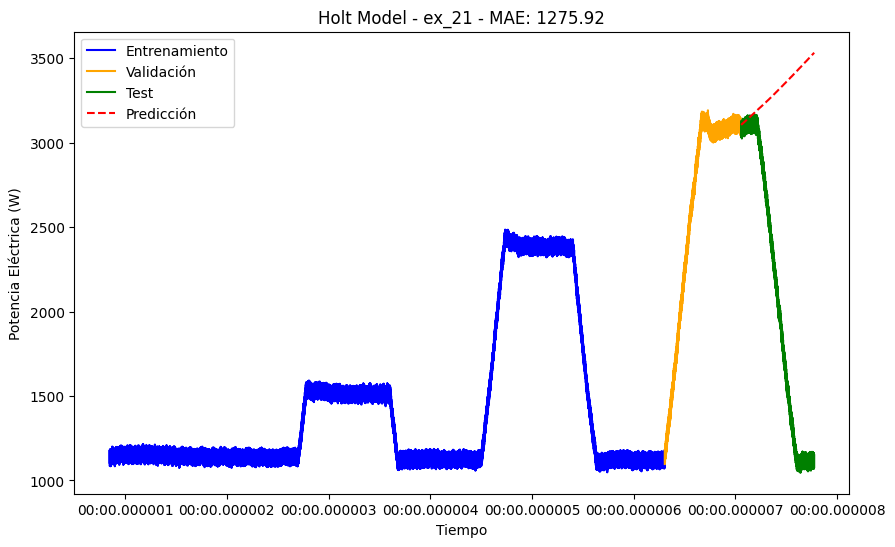

/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2411436008.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/miniconda3

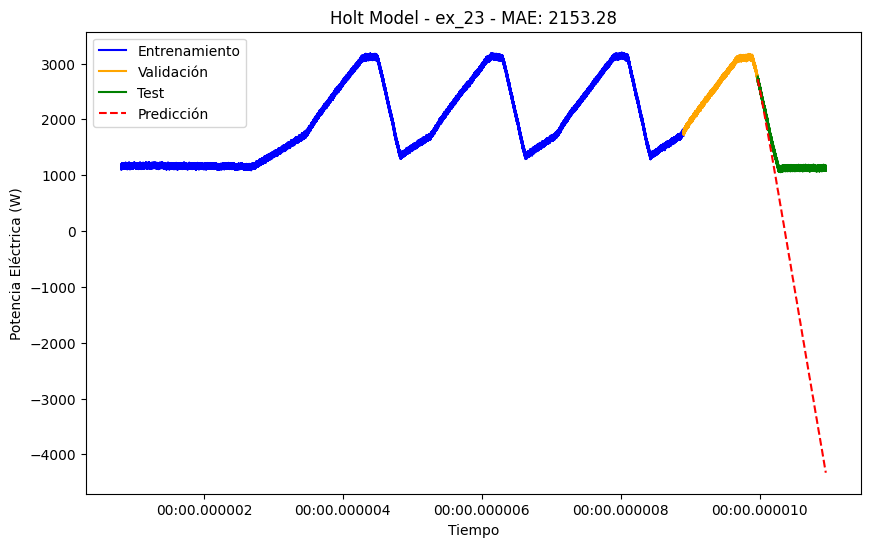

/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/pc/g1c35bc91zbfqvk3gwrrc_5c0000gn/T/ipykernel_68166/2411436008.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/miniconda3/envs/ml_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/miniconda3

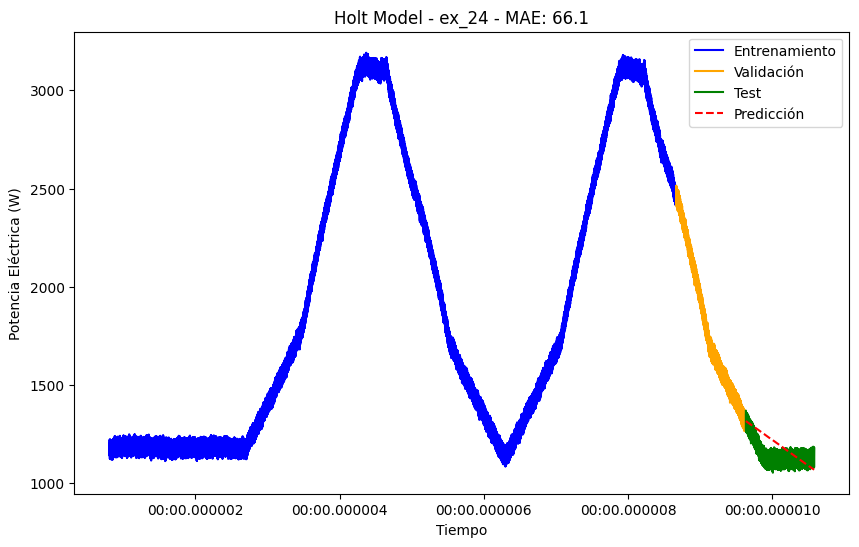

  Experimento  Alpha  Beta     MAE_Test
0        ex_1    0.1   0.7   112.778988
1        ex_9    0.1   0.4   207.449430
2       ex_20    0.1   0.6  1507.568976
3       ex_21    0.8   0.1  1275.922970
4       ex_23    0.1   0.1  2153.282450
5       ex_24    0.1   0.2    66.098809


In [7]:
dataframes = [df_ex_1.copy(), df_ex_9.copy(), df_ex_20.copy(), df_ex_21.copy(), df_ex_23.copy(), df_ex_24.copy()]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Crear un DataFrame para almacenar las métricas
metrics_holt_df = pd.DataFrame(columns=['Experimento', 'Alpha', 'Beta', 'MAE_Test'])

# Aplicar el modelo Holt a cada serie
for df, name in zip(dataframes, names):
    # Asegurar que el índice es de tipo datetime
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)

    # División de los datos
    n = len(df)
    train_end = int(0.8 * n)
    val_end = train_end + int(0.1 * n)

    train = df['el_power'][:train_end]
    val = df['el_power'][train_end:val_end]
    test = df['el_power'][val_end:]

    # Aplicar el modelo Holt
    best_alpha, best_beta, mae_test = des_model_tuning(
        train, val, test, step=len(test), trend='add',
        title=f'Holt Model - {name}'
    )

    # Almacenar las métricas
    temp_df = pd.DataFrame({
        'Experimento': [name],
        'Alpha': [best_alpha],
        'Beta': [best_beta],
        'MAE_Test': [mae_test]
    })

    metrics_holt_df = pd.concat([metrics_holt_df, temp_df], ignore_index=True)

# Mostrar las métricas finales
print(metrics_holt_df)




1. **Rendimiento general**:
   - El **Error Absoluto Medio (MAE)** varía considerablemente entre los experimentos. Esto indica que la capacidad del modelo para ajustar los datos de test depende significativamente de las características de cada serie temporal.

2. **Alpha y Beta**:
   - El valor de **α (Alpha)**, que controla el nivel de suavización, es relativamente bajo en la mayoría de los experimentos (0.1), excepto en el caso del **experimento ex_21**, donde es notablemente más alto (0.8).
   - **β (Beta)**, que controla la suavización de la tendencia, muestra una mayor variabilidad entre experimentos, con valores que van desde 0.1 hasta 0.7.

3. **Rendimiento por experimento**:
   - **ex_1 y ex_24** muestran los mejores resultados, con los menores errores (MAE de **112.78** y **66.09**, respectivamente). Esto sugiere que el modelo de Holt-Winters se adapta mejor a estas series.
   - En contraste, los experimentos **ex_20, ex_21, ex_23** tienen errores significativamente más altos, lo que sugiere que el modelo no se ajusta adecuadamente a las características de estas series de tiempo. 

4. **Conclusión**:
   - El modelo Holt-Winters parece ser adecuado para algunas series de tiempo, pero en otros casos es necesario ajustar los parámetros o considerar modelos alternativos. Las diferencias notables en el MAE sugieren que algunas series presentan patrones de estacionalidad o tendencia más complejos que el modelo no capta completamente.
